# Introduction to CFG in Scalpel

## What is the control flow graph
The control-flow graph(CFG) construction module generates intra-procedural CFGs, which are an essential component in static flow analysis with applications such as program optimization and taint analysis. A CFG represents all paths that might be traversed through a program during its execution. The CFGs of a Python project can be combined with the call graph to generate an inter-procedural CFG of the project.


## Let's install Scalpel first

```console
pip install python-scalple
```

### Import CFGBuilder

In [3]:
import sys

from scalpel.cfg import CFGBuilder

ModuleNotFoundError: No module named 'scalpel'

### Let's have some example codes.

### Example 1: While statement

In [2]:
# let's have an example code 
src= """
def fib():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

fib_gen = fib()
for _ in range(10):
    next(fib_gen)
"""

### The recursive data structure to store all CFG for given source code
Building CFGs for the given source code. Please note that the function returns a dictionary stucture in which CFGs for every function definition will be assigned a CFG. 

In [1]:
# Please note there cfg returned from CFGBuilder().build_from-src is a recursive datastructure
cfg = CFGBuilder().build_from_src("Fib", src)
fun_cfg = cfg.functioncfgs.items()

NameError: name 'CFGBuilder' is not defined

### A picture is worth a thousand words

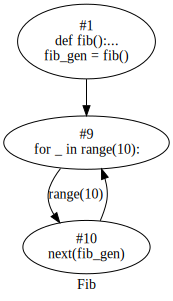

In [4]:
cfg.build_visual('png')

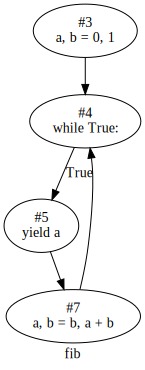

In [5]:
# let's visualize a function cfg 
fib_cfg = None 
for (block_id, fun_name), fun_cfg in cfg.functioncfgs.items():
    if fun_name == "fib":
        fib_cfg = fun_cfg
fib_cfg.build_visual('png')

### Example 2: if-else statement

In [6]:
src = '''
def compareNum(a,b,c):
    if a == 10:
        if b > c:
            a = b
        else:
            a = c
    print(a,b,c)
    
compareNum(11,3,2)
'''

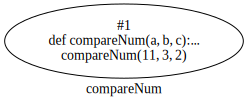

In [7]:
cfgTwo = CFGBuilder().build_from_src("compareNum", src)
fun_cfg = cfgTwo.functioncfgs.items()
cfgTwo.build_visual('png')

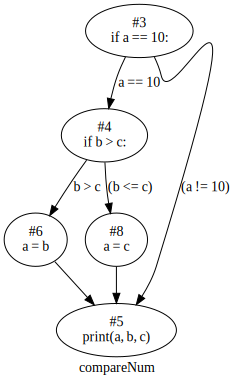

In [8]:
compareNum_cfg = None 
for (block_id, fun_name), fun_cfg in cfgTwo.functioncfgs.items():
    if fun_name == "compareNum":
        compareNum_cfg = fun_cfg
compareNum_cfg.build_visual('png')

### Example 3: for loop statement

In [9]:
src = '''
def countPrimes(num):
    count = 0
    for i in range(num+1):
        if i > 1:
            for j in range(2,i):
                if i % j == 0:
                    break
            else:
                print(i)
                count += 1
    print (count)
    
countPrimes(10)
'''

# m

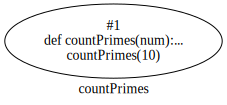

In [10]:
cfgThree = CFGBuilder().build_from_src("countPrimes", src)
fun_cfg = cfgThree.functioncfgs.items()
cfgThree.build_visual('png')

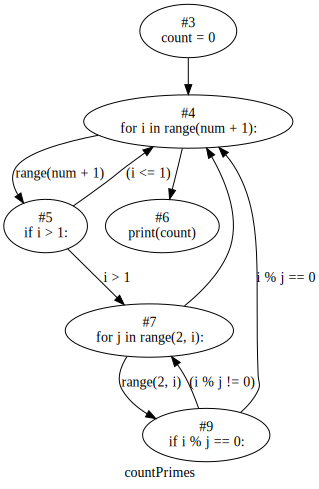

In [11]:
countPrimes_cfg = None 
for (block_id, fun_name), fun_cfg in cfgThree.functioncfgs.items():
    if fun_name == "countPrimes":
        countPrimes_cfg = fun_cfg
countPrimes_cfg.build_visual('png')

### Example 4: Try-except statement

In [12]:
src = '''
def divide(x,y):
    try:
        result = x // y
        print(result)
    except ZeroDivisionError:
        print("Erro! Cannot divide zero")
        
divide(10,2)
'''

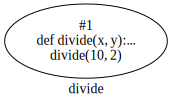

In [13]:
cfgFour = CFGBuilder().build_from_src("divide", src)
fun_cfg = cfgFour.functioncfgs.items()
cfgFour.build_visual('png')

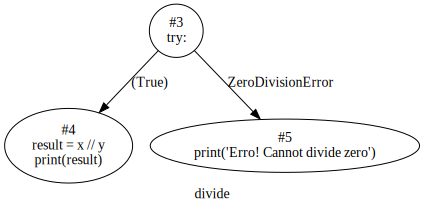

In [14]:
divide_cfg = None 
for (block_id, fun_name), fun_cfg in cfgFour.functioncfgs.items():
    if fun_name == "divide":
        divide_cfg = fun_cfg
divide_cfg.build_visual('png')

### More challenging Try-catch

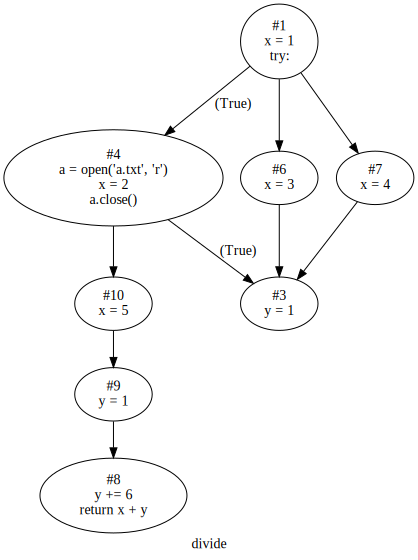

In [5]:
import sys
sys.path.append('../src/')
from scalpel.cfg import CFGBuilder

src  = """
x = 1
try:
    a = open("a.txt", "r")
    x = 2
    a.close()
except IOError:
    x = 3
except:
    x = 4
else:
    x = 5
finally:
    y = 1

y += 6
return x + y
"""
cfg_five = CFGBuilder().build_from_src("divide", src)
cfg_five.build_visual('png')


### Blocks in a CFG: A deep look into CFG 
Let's starting by BFS to get all blocks first

In [15]:
all_blocks = cfg.get_all_blocks()
entry_block = cfg.entryblock

### We can also retreive information from any blocks such as :

1. block id
2. source code of the block
3. a list of statements 

In [16]:
import ast 

entry_block = all_blocks[0]
print(f"block id :{entry_block.id}\n")
print(f"block source\n {entry_block.get_source()}")
print(f"block id :{entry_block.id}")

### 
statements = entry_block.statements
for stmt in statements:
    print(ast.dump(stmt))  # dump this statement as string from the AST node

block id :1

block source
 #1
def fib():...
fib_gen = fib()

block id :1
FunctionDef(name='fib', args=arguments(posonlyargs=[], args=[], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Assign(targets=[Tuple(elts=[Name(id='a', ctx=Store()), Name(id='b', ctx=Store())], ctx=Store())], value=Tuple(elts=[Constant(value=0), Constant(value=1)], ctx=Load())), While(test=Constant(value=True), body=[Expr(value=Yield(value=Name(id='a', ctx=Load()))), Assign(targets=[Tuple(elts=[Name(id='a', ctx=Store()), Name(id='b', ctx=Store())], ctx=Store())], value=Tuple(elts=[Name(id='b', ctx=Load()), BinOp(left=Name(id='a', ctx=Load()), op=Add(), right=Name(id='b', ctx=Load()))], ctx=Load()))], orelse=[])], decorator_list=[])
Assign(targets=[Name(id='fib_gen', ctx=Store())], value=Call(func=Name(id='fib', ctx=Load()), args=[], keywords=[]))
